<a href="https://colab.research.google.com/github/MariaDolmatova/ML/blob/main/Lecture%201%262%20notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from IPython.display import Image

In [58]:
uploaded = files.upload()


Saving png to png


#**Lesson 1**
Error equation:
$Err(w) = \frac{1}{2} \displaystyle\sum_{i=1}^{N} (y_i - f_w(x_i))^2$.
The _**error function**_ has only one min, therefore it's always easy to find the most optimal hypothesis by establishing
$ \frac{d Err(w)}{dw_0} = 0$




$h_x(x) = w_0 + w_1 x$

$\frac{d h_w(x)}{dw_1} = 0$, $\frac{d h_w(x)}{dw_0} = 0$, $w_0^* = \bar{y} - w_1^* \bar{x}$, $w_1^* = \frac{\sum(x - \bar{x})(y - \bar{y})}{\sum(x - \bar{x})^2}$

A model could be **overfitting** meaning it fits the exostong data the best but isn't extrapolateable


**Generalisation gap** the point where we are overfitting the model (great performance on the training set, really bad on the test data). Solution -- add more data.

The larger the amount of parametres, the larger the coefficients (in most cases), in order to fix this introduce:


$Err(w) = \frac{1}{2} \displaystyle\sum_{i=1}^{N} (y_i - f_w(x_i))^2 + \frac{\lambda}{2} ||w||^2$, $||w||^2 = w^T w = w_0^2 + w_1^2 + w_2^2 + ... + w_N^2$


$\lambda$ (hyperparameter) controls how big the coefficients are. If $\lambda$ is too big, the coefficieant will be tiny. This way we woud have to find the best fit with our limit.

## Regression types
###1. **_Lasso regression_**
$Err(w) = \frac{1}{2} \displaystyle\sum_{i=1}^{N} (y_i - f_w(x_i))^2 + \frac{\lambda}{2} ||w||$

$||w|| = \sqrt{w \cdot w} = |w_1| + |w_2| + ...$

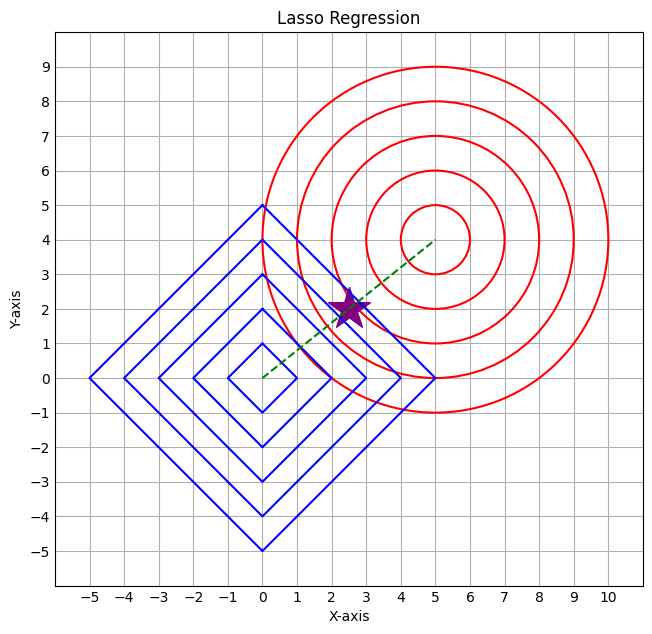

In [63]:
const_values = [1, 2, 3, 4, 5]
center2 = (5, 4)
midpoint = (5 / 2, 4 / 2)

plt.figure(figsize=(6, 6))
ax = plt.gca()

# Draw diamond lines for |x| + |y| = const
for const in const_values:
    x = [0, const, 0, -const, 0]
    y = [const, 0, -const, 0, const]
    ax.plot(x, y, color="blue", linewidth=1.5)

for radius in const_values:
    ax.add_patch(plt.Circle(center2, radius, edgecolor="red", fill=False, linewidth=1.5))

# Draw line between the origin and the red circle center and mark the midpoint
ax.add_line(plt.Line2D([0, center2[0]], [0, center2[1]], color="green", linewidth=1.5, linestyle="--"))
plt.scatter(*midpoint, color="purple", s=1000, marker="*", label="Midpoint")

ax.set(xlim=(-6, 11), xticks=np.arange(-5, 11), ylim=(-6, 10), yticks=np.arange(-5, 10))

ax.grid(True), ax.set_aspect('equal', 'box'), ax.set_xlabel('X-axis'), ax.set_ylabel('Y-axis')
plt.title('Lasso Regression')

plt.show()


Purple star identifies the best fit with both conditions, i. e. the min $Err(w)$ (not necesssarily the middle)

The quadratic shape is determined by $||w||$ -- since at the end it' a constant we coudl put any number in $C = |w_1| + |w_2|$. Let's say $1 = |x| + |y|$. Then $|y| = |x| - 1$ meaning we are left with 4 options:


*   y = x - 1
*  y = -x -1

*   y = 1 - x
*   y = 1 + x

$x \in [-1, 0]$ or $[0,  1]$
Looking like:





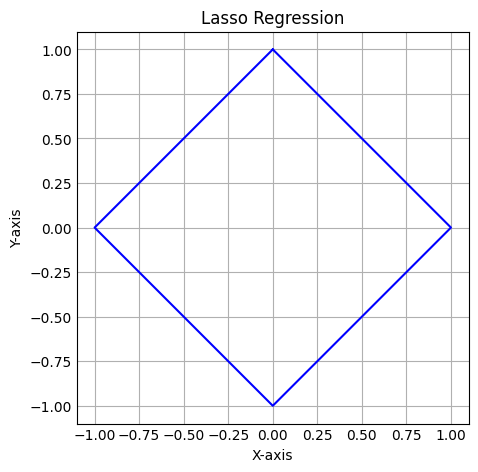

In [64]:
plt.figure(figsize=(4, 4))
ax = plt.gca()

x = [0, 1, 0, -1, 0]
y = [1, 0, -1, 0, 1]
ax.plot(x, y, color="blue", linewidth=1.5)

ax.grid(True), ax.set_aspect('equal', 'box'), ax.set_xlabel('X-axis'), ax.set_ylabel('Y-axis')
plt.title('Lasso Regression')

plt.show()

The bigger the const, the bigger the diameter.

###1. **_Ridger? regression_**
$Err(w) = \frac{1}{2} \displaystyle\sum_{i=1}^{N} (y_i - f_w(x_i))^2 + \frac{\lambda}{2} ||w||^2$

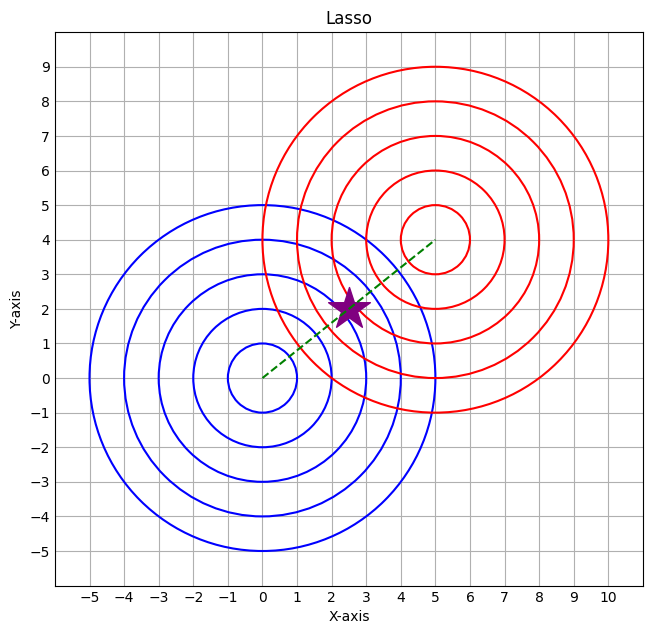

In [65]:
radii = [1, 2, 3, 4, 5]
centers = [(0, 0), (5, 4)]
midpoint = ((centers[0][0] + centers[1][0]) / 2, (centers[0][1] + centers[1][1]) / 2)

plt.figure(figsize=(6, 6))
ax = plt.gca()

for center, color in zip(centers, ["blue", "red"]):
    for radius in radii:
        ax.add_patch(plt.Circle(center, radius, edgecolor=color, fill=False, linewidth=1.5))

# Draw line between centers and a star at the midpoint
ax.add_line(plt.Line2D([centers[0][0], centers[1][0]], [centers[0][1], centers[1][1]], color="green", linewidth=1.5, linestyle="--"))
plt.scatter(*midpoint, color="purple", s=1000, marker="*", label="Midpoint")

# Axis settings
ax.set(xlim=(-6, 11), ylim=(-6, 10), xticks=np.arange(-5, 11), yticks=np.arange(-5, 10))

ax.grid(True), ax.set_aspect('equal', 'box'), ax.set_xlabel('X-axis'), ax.set_ylabel('Y-axis')
plt.title('Lasso')

plt.show()


#Lesson 2
##Perceptron

$X_i \in R^ d$,

$x_i = [x^1, ...x^d]$,

$y_i \in [-1; 1]$

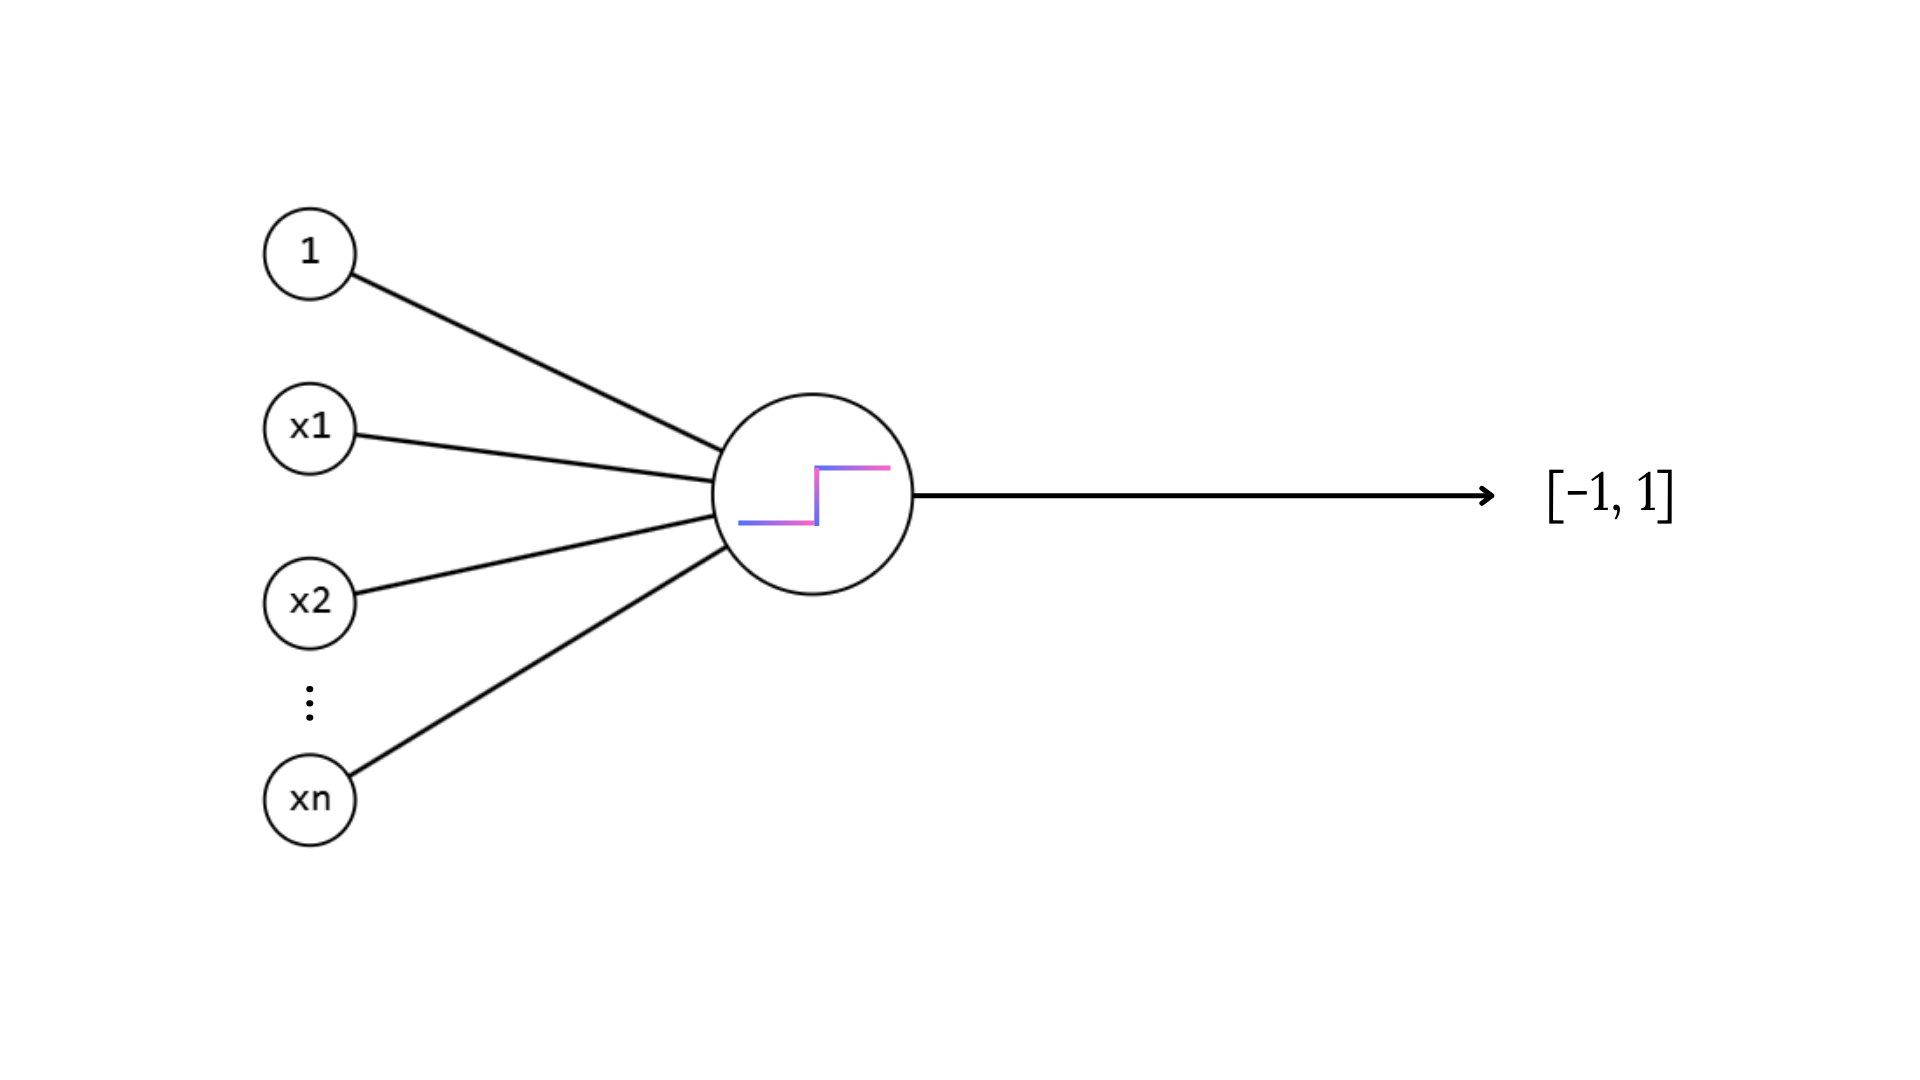

In [62]:
Image('png', width=900)

$w_i \cdot x_i > b$

$ \displaystyle\sum_{i=1}^{d} w_i \cdot x_i - b > 0 \implies \displaystyle\sum_{i=0}^{d} w_i \cdot x_i > 0$

$h_w(x) =
 \begin{cases}
  1,  &\text{$\sum w_j \cdot x_j > 0$, $\quad  w^T x > 0$}\\
   -1,  &\text{$\sum w_j \cdot x_j < 0$}
 \end{cases}$

 if the weighted sum reaches the threshold, the "neuron" fires (output 1), otherwise output -1. $w^T$ -- T means transposition. Since it's a vector multiplication, the amount of colunts of the first multiplicator should correspond to the anoubt of the lines in the second.

 _Transposition switches places of the colums and rows e.g. an element in 1 row 3 column will go to the 3rd row 1st column._

<Figure size 5000x2000 with 0 Axes>

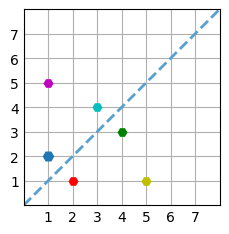

In [66]:
plt.style.use('_mpl-gallery')

x = np.linspace(0, 10, 100)
y = x

plt.figure(figsize=(50, 20))

fig, ax = plt.subplots()
ax.plot(1, 2, 'H', markeredgewidth=2), ax.plot(1,  5, 'Hm', linewidth=2), ax.plot(3,  4, 'Hc', linewidth=2), ax.plot(4,  3, 'Hg', linewidth=2), ax.plot(5,  1, 'Hy', linewidth=2), ax.plot(2,  1, 'Hr', linewidth=2), ax.plot(x,  y, '--', linewidth=2)
ax.set(xlim=(0, 8), xticks=np.arange(1, 8), ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

One of the examples of classification.

##Perceptron Algo
Initialise w random val while not all samples classified

for i = 1...n

   if $y_i w^T x_i < 0$

   if $y_i > 0, \quad  w \leftarrow w + x_i$

   else $\quad  w \leftarrow w - w_i$


##When samples are classified correctly?

$w^T x > 0, \quad  y_i w^T x > 0$

$w^T x < 0, \quad y_i w^T x > 0$

$x>0, \ y > 0 \quad  or \quad  x<0,  \  y < 0 $


**_Short answer: If $ \quad y_i w^T x > 0$_**

##Gradient Descend

###**Linear Separability**

Sigmoid function
$\sigma (w^T x) = \frac{1}{\sqrt{1 + e^{-w^T x}}}$


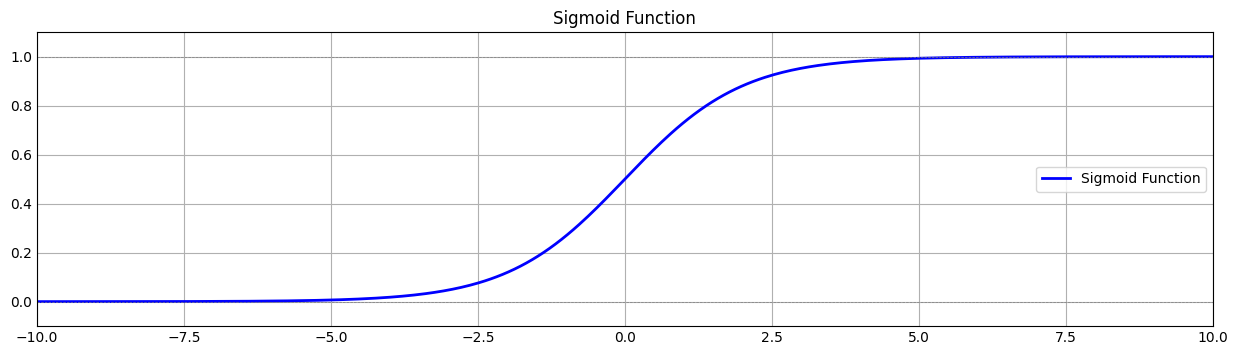

In [70]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_values = np.linspace(-10, 10, 400)
y_values = sigmoid(x_values)

plt.figure(figsize=(12, 3))

plt.plot(x_values, y_values, color="blue", linewidth=2, label='Sigmoid Function')

plt.axhline(0, color='grey', lw=0.5, ls='--')  # Horizontal line at y=0
plt.axhline(1, color='grey', lw=0.5, ls='--')  # Horizontal line at y=1

# Set up axis limits and labels
plt.xlim(-10, 10), plt.ylim(-0.1, 1.1), plt.title('Sigmoid Function')
plt.grid(True)
plt.legend()

plt.show()

![Google's logo](https://www.google.com/images/logos/google_logo_41.png)
